In [1]:
import numpy as np
import tifffile as tiff
import torch
from torch.utils.data import Dataset
from pathlib import Path

def read_gt_tiff(gt_image_path):
    with tiff.TiffFile(gt_image_path) as tif:
        gt_image = tif.asarray()
        palette = tif.pages[0].colormap  # Extracting the colormap
        if palette is not None:
            # Convert palette to a grayscale image (assuming single channel with values 0-255)
            palette = palette.reshape(-1, 3)#[:, 0]  # Take the first channel of the palette
            # print('Palette.shape', palette.shape)
            gt_image = palette[gt_image]
            # print("Ground Truth Image Shape:", gt_image.shape)
    return gt_image

data_dir = "/mnt/data/shubham/hsi_msi/dc_mall"
gt_image_path = Path(data_dir) / "GT.tif"
img = read_gt_tiff(gt_image_path)

In [3]:
import matplotlib.pyplot as plt

In [5]:
np.min(img), np.max(img)

(257, 65535)

In [20]:
def read_gt_image(gt_image_path):
    with tiff.TiffFile(gt_image_path) as tif:
        gt_image = tif.asarray()
        colormap = tif.pages[0].colormap  # Extracting the colormap
        if colormap is not None:
            colormap = colormap.reshape(-1, 3)
            colormap = (colormap / 65535) * 255  # Normalize 16-bit to 8-bit
            colormap = colormap.astype(np.uint8)
            unique_colors = {tuple(color): idx for idx, color in enumerate(colormap)}
            color_image = colormap[gt_image]
            gt_image = np.array([unique_colors[tuple(colormap[pixel])] for pixel in gt_image.flat]).reshape(gt_image.shape)
    return gt_image, color_image

data_dir = "/mnt/data/shubham/hsi_msi/dc_mall"
gt_image_path = Path(data_dir) / "GT.tif"
final_gt, color_image = read_gt_image(gt_image_path)

In [22]:
import matplotlib.pyplot as plt

(-0.5, 306.5, 1279.5, -0.5)

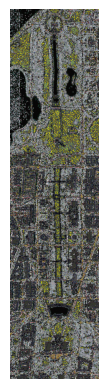

In [24]:
plt.imshow(color_image)
plt.axis('off')

## Urban dataset

In [3]:
import sys
sys.path.append('../')
from datasets import dataset_factory

data_dir = "/mnt/data/shubham/hsi_msi/urban"
ds = dataset_factory['urban'](data_dir=data_dir, 
                              rgb_height=64, rgb_width=64, 
                              hsi_height=32, hsi_width=32)

In [6]:
import numpy as np
img = (ds.img_rgb*255).astype(np.uint8)

In [7]:
import matplotlib.pyplot as plt

(-0.5, 306.5, 306.5, -0.5)

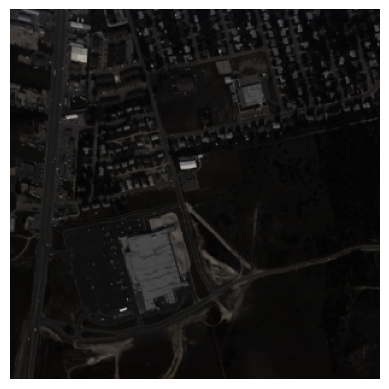

In [9]:
plt.imshow(img)
plt.axis('off')